### Exploratory Data Analysis

In [23]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

#Time Series Plot Soruce 
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/


In [3]:
cd ..

/Users/sreidy/Documents/UMBC 2020/fall2020/DATA601/HW1


In [4]:
cd Data

/Users/sreidy/Documents/UMBC 2020/fall2020/DATA601/HW1/Data


In [5]:
# Read in Processed CSV from dataProcessing.ipynb
df = pd.read_csv("Covid_Data_Cleaned_All_States.csv")
df.head()

,Unnamed: 0,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,...,1383,1385,1398,1413,1420,1432,1442,1447,1585,1619
1,1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,...,4586,4609,4639,4678,4722,4752,4781,4800,4978,5003
2,2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,...,617,617,618,618,618,620,622,626,801,809
3,3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,...,557,562,564,566,574,576,578,581,610,612
4,4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,...,1070,1071,1082,1099,1109,1114,1121,1128,1464,1487


#### State Summary 

In [6]:
#most recent total number of confirmed cases by State
recent_totals_by_state = df.pivot_table(['9/16/20'],['Province_State'], aggfunc='sum')
recent_totals_by_state.rename(columns={'9/16/20':'ConfirmedCases'}, inplace=True)
recent_totals_by_state

,ConfirmedCases
Province_State,
Alabama,141087
Alaska,6431
Arizona,209904
Arkansas,70761
California,771321
Colorado,62666
Connecticut,55034
Delaware,18756
District of Columbia,14743


In [7]:
#US Mean Case Count 
recent_totals_by_state.ConfirmedCases.mean()

126156.63461538461

#### Looking At Maryland 

In [9]:
cd States

/Users/sreidy/Documents/UMBC 2020/fall2020/DATA601/HW1/Data/States


In [11]:
MDdf = pd.read_csv("Maryland.csv",parse_dates=True,index_col=0)
MDdf.dtypes

Allegany             int64
Anne Arundel         int64
Baltimore            int64
Baltimore City       int64
Calvert              int64
Caroline             int64
Carroll              int64
Cecil                int64
Charles              int64
Dorchester           int64
Frederick            int64
Garrett              int64
Harford              int64
Howard               int64
Kent                 int64
Montgomery           int64
Prince George's      int64
Queen Anne's         int64
Somerset             int64
St. Mary's           int64
Talbot               int64
Washington           int64
Wicomico             int64
Worcester            int64
Total              float64
dtype: object

In [30]:
MDdf.head()

,Allegany,Anne Arundel,Baltimore,Baltimore City,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,...,Montgomery,Prince George's,Queen Anne's,Somerset,St. Mary's,Talbot,Washington,Wicomico,Worcester,Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### MD Total Cases 

Text(0.5, 1.0, 'Covid-19 Maryland')

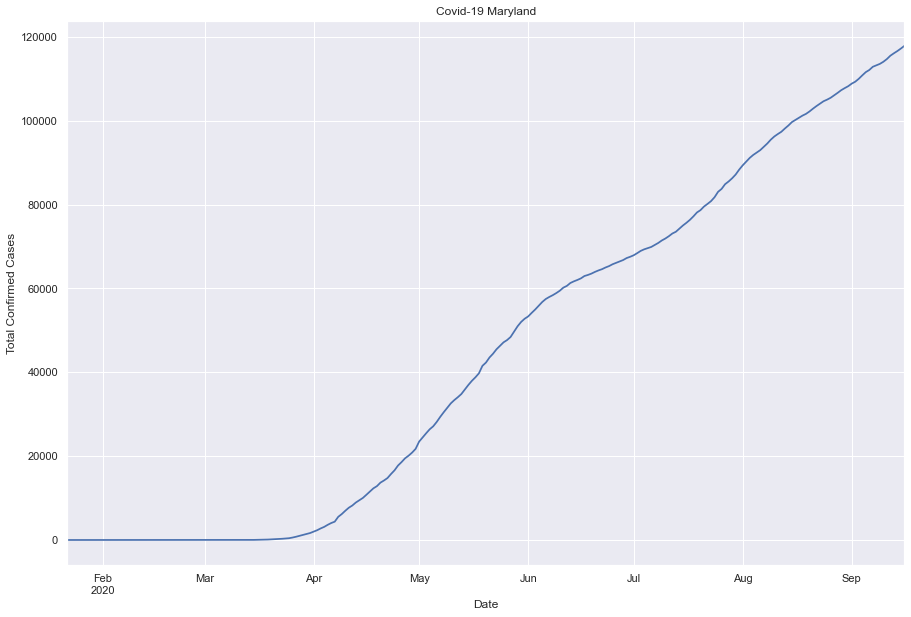

In [25]:
totalPlot = MDdf.Total.plot(linewidth=1.75)
totalPlot.set_ylabel("Total Confirmed Cases")
totalPlot.set_title("Covid-19 Maryland")

#### Cases By County 

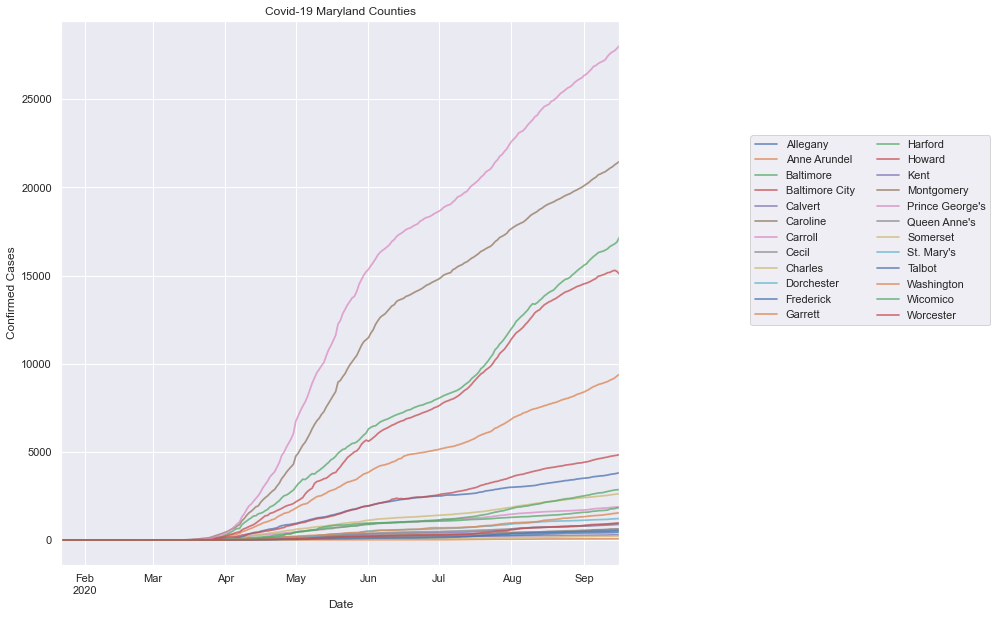

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
MDPlot = MDdf.iloc[:,0:len(MDdf.columns)-1].plot(linewidth=1.75, alpha= 0.75)
MDPlot.set_ylabel("Confirmed Cases")
MDPlot.set_title("Covid-19 Maryland Counties")
position = MDPlot.get_position()
MDPlot.set_position([position.x0, position.y0, position.width*0.5, position.height])
MDPlot.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), ncol=2)

#### 30 Day Rolling Avg Cases 

In [54]:
MDrollingAvg = MDdf.rolling(30).mean()


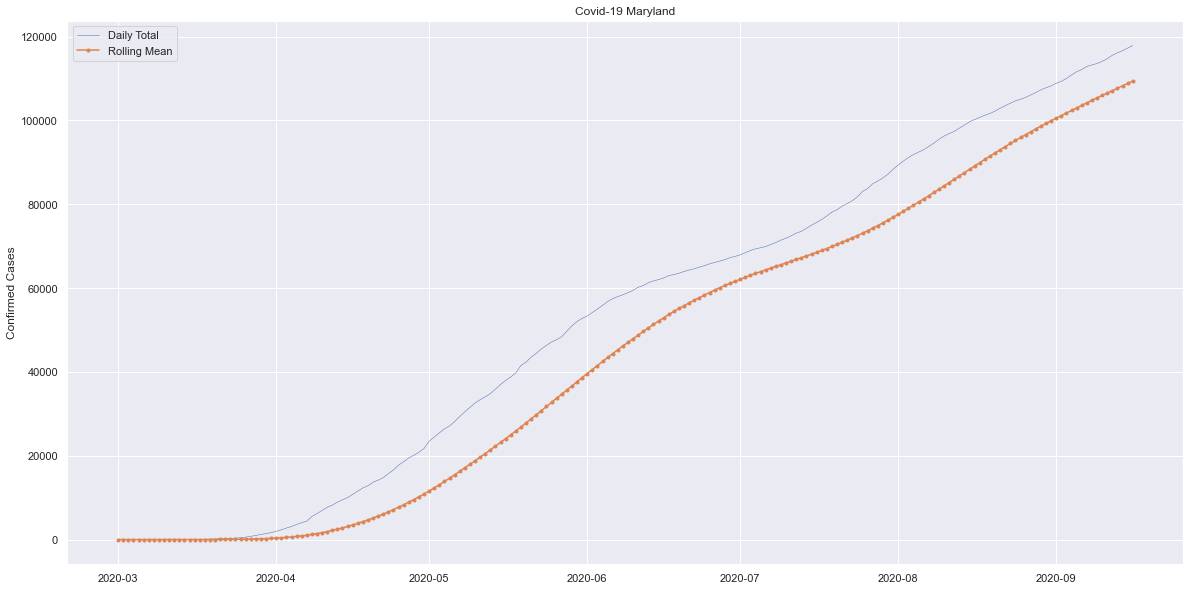

In [57]:
# 7-day rolling mean time series together
start = '2020-03-01'
fig, x = plt.subplots()
x.plot(MDdf.loc[start:, 'Total'],
 linestyle='-', linewidth=0.5, label='Daily Total')
x.plot(MDrollingAvg.loc[start:, 'Total'],
marker='.', linestyle='-',linewidth=1.5, label='Rolling Mean')
x.set_ylabel('Confirmed Cases')
x.set_title("Covid-19 Maryland")
x.legend()

### Forcasting 